# Final Portfolio Project - OK Cupid Data Investigation 

#### Hello! Welcome to my final portfolio project for Codecademy's "Data Scientist - Machine Learning Specialist" path. 

The prompt for this project is quite open-ended. Codecademy has provided me with a large CSV file containing data from the popular dating site OK Cupid. Beyond that the responsibility is on me to figure out what to do with that data - what questions to ask, how to work towards the answers, and which predictive models to build to answer those questions.

## Project Scope

As someone who has coincidentally used OK Cupid's website in the past - with variable success and an overall positive experience - I am excited to see what kind of insights can be drawn from this dataset. I will focus on answering the following question:

Which characteristic is the best predictor for whether or not someone wants kids if they don't have them already?

## Initial Investigations / Codespace Setup

I started with importing Pandas and NumPy. I will almost certainly be importing more libraries later but for now these two will suffice. After that I imported the dataset into a Dataframe, examined the head, a basic overview of the summary statistics for the quantitative variables, and the data types for all the columns.

In [372]:
import pandas as pd
import numpy as np

In [373]:
df = pd.read_csv('profiles.csv')

In [374]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [375]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [376]:
df.describe(include='all')

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,59946.000000,54650,35551,56961,45866,53318,54458,52374,50308,48470,...,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,NaN,12,18,6,3,32,54350,51516,48635,43533,...,199,15,3,15,45,2,48,5,7647,5
top,NaN,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,NaN,14652,16585,41780,37724,23959,12,61,82,529,...,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [377]:
df.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

Based on my experience with the site I can say that the columns have a familiar feel to them. Seeing the information in raw data form helps illuminate in my mind how their website and UX is organized, and how this data can interact to help make profile recommendations.

More relevant to the project, it helps explain the null values that are present in the qualitative columns. Plenty of those columns are optional parameters that you either choose to disregard, or ones that you may fill in at a later time. It implies that the qualitative columns may play a more secondary role in matchmaking since they can be optional, or that if there are other quantitative columns that *are* required then those would likely carry more weight.

## Cleaning/Tidying 

#### Outlier Removal

Initial inspection of the dataset showed some curious datapoints. For example, the highest age in the dataset is 110, and inspection of the higher ranges of ages showed two outlier profiles that appear to be "junk" profiles. Thus they were removed from the dataset.

In [379]:
df[df.age > 69]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
2512,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"daly city, california",NaN,straight,NaN,NaN,f,NaN,NaN,english,single
25324,109,athletic,mostly other,NaN,never,working on masters program,NaN,NaN,NaN,nothing,...,"san francisco, california",might want kids,straight,NaN,other and somewhat serious about it,m,aquarius but it doesn&rsquo;t matter,when drinking,english (okay),available


In [380]:
df = df[df.age <= 70].reset_index() 

#### Income Cleanup

Another curiosity I found is that within the "income" column there were a large amount of profiles that showed -1 for their values. I take this to mean that the person declined to disclose their income, but what makes this tricky is that this accounts for ~81% of the data! With that many datapoints it seems unwise to remove them, so in the meantime I changed them all to null. 

In [381]:
df.income.value_counts()

-1          48440
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

In [382]:
(48440 / 59944) * 100

80.80875483784867

In [383]:
df.income = df.income.replace({-1:np.nan})

In [384]:
df.income.unique()

array([     nan,   80000.,   20000.,   40000.,   30000.,   50000.,
         60000., 1000000.,  150000.,  100000.,  500000.,   70000.,
        250000.])

#### Offspring Cleanup

Since my first question deals with people that don't have kids but want them in some capacity, the "offspring" column needs to become the target variable. This involves removing all the null values, removing the profiles that already have kids, removing the profiles that are ambiguous with 'doesn't have kids', and reclassifying the rest of them as binary variables - 1 if they want kids and 0 if they don't. In this case I classified any instance of "might want kids" as 1 as an assumption for this data.

In [385]:
df.offspring.unique()

array(['doesn&rsquo;t have kids, but might want them', nan,
       'doesn&rsquo;t want kids',
       'doesn&rsquo;t have kids, but wants them',
       'doesn&rsquo;t have kids', 'wants kids', 'has a kid', 'has kids',
       'doesn&rsquo;t have kids, and doesn&rsquo;t want any',
       'has kids, but doesn&rsquo;t want more',
       'has a kid, but doesn&rsquo;t want more',
       'has a kid, and wants more', 'has kids, and might want more',
       'might want kids', 'has a kid, and might want more',
       'has kids, and wants more'], dtype=object)

In [386]:
df.dropna(subset='offspring', inplace=True, how='any')

In [387]:
has_kids = ['has a kid', 'has kids', 'has kids, but doesn&rsquo;t want more',
       'has a kid, but doesn&rsquo;t want more',
       'has a kid, and wants more', 'has kids, and might want more', 'has a kid, and might want more',
       'has kids, and wants more']

df = df[~df.offspring.isin(has_kids)]
df = df[~(df == 'doesn&rsquo;t have kids').any(axis=1)]

In [388]:
df.offspring = df.offspring.replace({'doesn&rsquo;t have kids, but might want them': 1, 'doesn&rsquo;t have kids, but wants them': 1,
                                    'doesn&rsquo;t want kids': 0, 'doesn&rsquo;t have kids, and doesn&rsquo;t want any': 0, 
                                    'wants kids': 1, 'might want kids': 1})

#### Income Cleanup Revisited 

At this point I had to revisit the null values within the "income" column, since I couldn't just leave a large portion of null data in a column that I hypothesized would contribute to the target variable, and this is tricky since there is such a large disparity and skewness in the numbers. Taking into account the high outliers of data that usually crops up with income ranges, I filled the null values with the IQR of 60000. This is another major assumption but it's one that I think will best round out the data given what I'm working with.

In [389]:
iqr = df.income.quantile(0.75) - df.income.quantile(0.25)

df = df.fillna(value = {'income':iqr})

#### Removing Unnecessary Columns

Some of the columns in the dataset either can't be easily quantified for the question that I'm asking, or it would be unnecessary to do so. For this reason those columns were removed.

In [390]:
df.isna().sum()

index             0
age               0
body_type       642
diet           2925
drinks          241
drugs          2312
education       780
essay0          966
essay1         1278
essay2         1629
essay3         1902
essay4         1847
essay5         1844
essay6         2402
essay7         2145
essay8         3233
essay9         2077
ethnicity       894
height            0
income            0
job             801
last_online       0
location          0
offspring         0
orientation       0
pets           2189
religion       2664
sex               0
sign           1372
smokes          542
speaks            8
status            0
dtype: int64

In [391]:
df = df.drop(columns = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9',
                       'last_online'])

#### Body Type, Job

Upon examining these columns, I decided to change the null values to "rather not say" since this is essentially the same thing.

In [392]:
df.body_type.value_counts()

average           3064
fit               2391
athletic          2149
curvy             1011
thin               948
a little extra     693
skinny             381
full figured       285
overweight         131
jacked              87
used up             75
rather not say      48
Name: body_type, dtype: int64

In [393]:
df.body_type.fillna('rather not say', inplace=True)
df.job.fillna('rather not say', inplace=True)

#### Smokes, Drinks, Drugs, Job

I changed the null values to "no", "socially", and "never" since this was the most common answer, although this is another major assumption.

In [394]:
df.smokes.fillna('no', inplace=True)
df.drinks.fillna('socially', inplace=True)
df.drugs.fillna('never', inplace=True)

#### Pets

Dropped the null values for this column.

In [395]:
df.dropna(subset = 'pets', inplace=True)

In [396]:
df.isna().sum()

index             0
age               0
body_type         0
diet           2153
drinks            0
drugs             0
education       556
ethnicity       645
height            0
income            0
job               0
location          0
offspring         0
orientation       0
pets              0
religion       1936
sex               0
sign            915
smokes            0
speaks            4
status            0
dtype: int64

#### Diet, Education, Ethnicity, Religion, Sign, Speaks

Due to the complexity of how these columns are structured, since they aggregate multiple levels of a given subcategory (ie "I am a vegetarian" vs I'm *sometimes* a vegetarian"), I have chosen to omit these columns from the model consideration. I suppose if I had better knowlesge of how to use the data within these columns I would be an employee at OK Cupid. :)

In [397]:
df = df.drop(columns = ['diet', 'education', 'ethnicity', 'religion', 'sign', 'speaks'])

## Preparing the Model

#### Create the Variables

This sets up our variables for the model via One-Hot Encoding. The y value has already been made into a binary variable.

In [398]:
X = pd.get_dummies(data = df, columns = ['index', 'age', 'body_type', 'drinks', 'drugs', 'height', 'income',
       'job', 'location', 'orientation', 'pets', 'sex', 'smokes',
       'status'])
y = df.offspring

#### Model Setup

Due to the nature of the data I chose to try a decision tree classifier, since this deals with a fairly large amount of data (even after all the trimming down) and because I want to see which feature would carry the most weight towards whether or not a person wanted kids.

In [410]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

dtree = DecisionTreeClassifier(max_depth = 10)

#### Fitting the Model 

In [411]:
dtree.fit(x_train, y_train)

print(f'Decision tree depth: {dtree.get_depth()}')

Decision tree depth: 1


#### Testing Accuracy

In [412]:
y_pred = dtree.predict(x_test)

print(f'Test set accuracy: {dtree.score(x_test, y_test)}')


Test set accuracy: 1.0


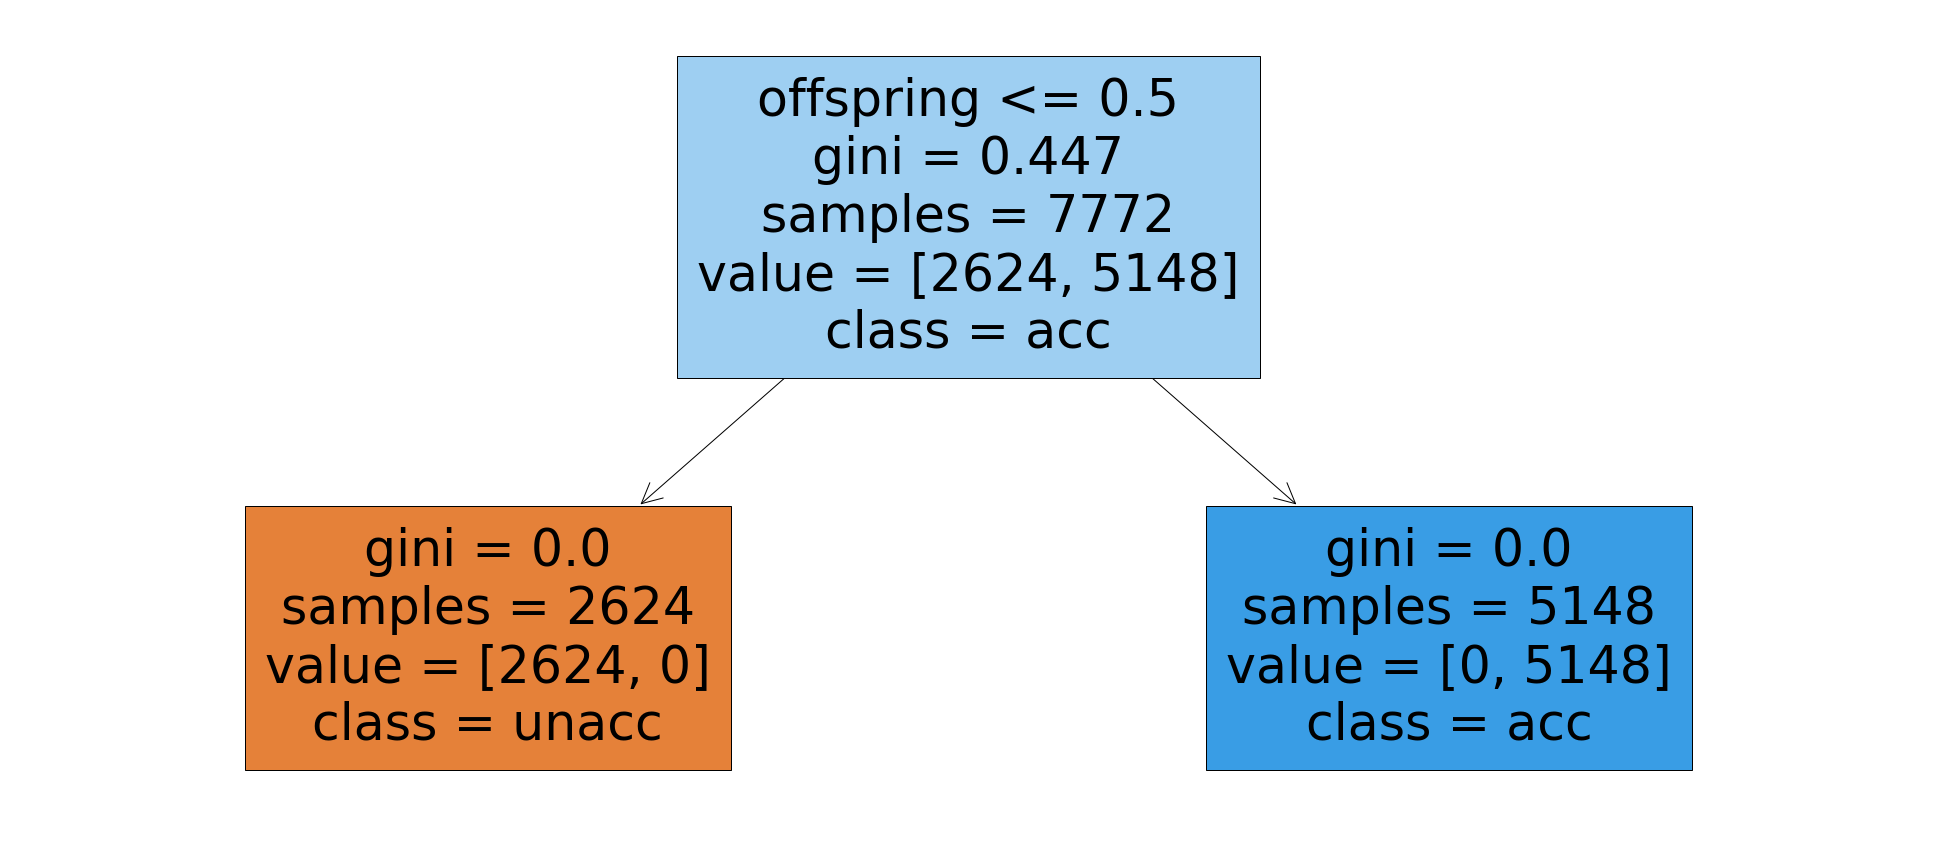

In [413]:
plt.figure(figsize=(27,12))
tree.plot_tree(dtree, feature_names = x_train.columns, class_names = ['unacc','acc'], filled=True)
plt.tight_layout()
plt.show()